<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/230222_Classification_with_Neural_Networks_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2022/01/10/classification-with-neural-networks-using-python/

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
imgIndex=9
image = xtrain[imgIndex]

Image label:  5


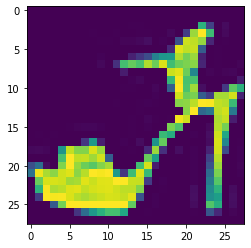

In [5]:
print('Image label: ', ytrain[imgIndex])
plt.imshow(image)

In [6]:
xtrain.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, epochs=30, validation_data = (xvalid,yvalid))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7246 - accuracy: 0.7653 - val_loss: 0.5052 - val_accuracy: 0.8296
Epoch 2/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4867 - accuracy: 0.8323 - val_loss: 0.4446 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 20s 12ms/step - loss: 0.4423 - accuracy: 0.8454 - val_loss: 0.4322 - val_accuracy: 0.8496
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4152 - accuracy: 0.8552 - val_loss: 0.4002 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3936 - accuracy: 0.8612 - val_loss: 0.3826 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3788 - accuracy: 0.8661 - val_loss: 0.3787 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3646 - accuracy: 0.8718 - val_loss: 0.3789 - val_

In [12]:
new = xtest[:5]
predictions = model.predict(new)
predictions

1/1 [==============================] - 0s 196ms/step


array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [7.2211e-33, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
      dtype=float32)

In [13]:
classes = np.argmax(predictions, axis=1)
classes

array([9, 2, 1, 1, 6])